In [71]:
import numpy as np
import pandas as pd
import os,sys

In [72]:
path_data = os.path.join(os.getcwd(),os.pardir,os.pardir,'data')
data_list = os.listdir(path_data)
print(data_list)

['bleaching', 'fishing_activity', 'mmsi-daily-csvs-10-v2-2012', 'mmsi-daily-csvs-10-v2-2013', 'mmsi-daily-csvs-10-v2-2014', 'mmsi-daily-csvs-10-v2-2015', 'mmsi-daily-csvs-10-v2-2016', 'mmsi-daily-csvs-10-v2-2017', 'mmsi-daily-csvs-10-v2-2018', 'mmsi-daily-csvs-10-v2-2019', 'protected_area']


In [73]:
bleaching_data_path = os.path.join(path_data,'bleaching')
bleaching_data_file = os.path.join(bleaching_data_path,'global_bleaching_environmental.csv')
bleaching_data = pd.read_csv(bleaching_data_file, encoding='ISO-8859-1')
# print(bleaching_data.head())
print(len(bleaching_data))

41361


C:\Users\QWT\AppData\Local\Temp\ipykernel_11172\3985471678.py:3: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  bleaching_data = pd.read_csv(bleaching_data_file, encoding='ISO-8859-1')


In [74]:
start_year = 2000
end_year = 2019
year = 2008
year_filtered_bleaching_data = bleaching_data[(bleaching_data['Date_Year'] >= start_year) & (bleaching_data['Date_Year'] <= end_year)]
# print(filtered_bleaching_data.head())
print(len(year_filtered_bleaching_data))

37632


In [75]:
lat_min, lat_max = -80, 80
lon_min, lon_max = -180, 180
region_filtered_bleaching_data = year_filtered_bleaching_data[(year_filtered_bleaching_data['Latitude_Degrees'] >= lat_min) & (year_filtered_bleaching_data['Latitude_Degrees'] <= lat_max) & (year_filtered_bleaching_data['Longitude_Degrees'] >= lon_min) & (year_filtered_bleaching_data['Longitude_Degrees'] <= lon_max)]
print(len(region_filtered_bleaching_data))

37632


In [76]:

bleaching_data_year = region_filtered_bleaching_data[region_filtered_bleaching_data['Date_Year'] == year]
# bleaching_data_year['Percent_Bleaching'] = pd.to_numeric(bleaching_data_year['Percent_Bleaching'], errors='coerce')
bleaching_data_year.loc[:, 'ClimSST'] = pd.to_numeric(bleaching_data_year.loc[:, 'ClimSST'], errors='coerce')
bleaching_data_year = bleaching_data_year.dropna(subset=['ClimSST'])
bleaching_data_year = bleaching_data_year[bleaching_data_year['ClimSST'] > 0]
print(len(bleaching_data_year))

2045


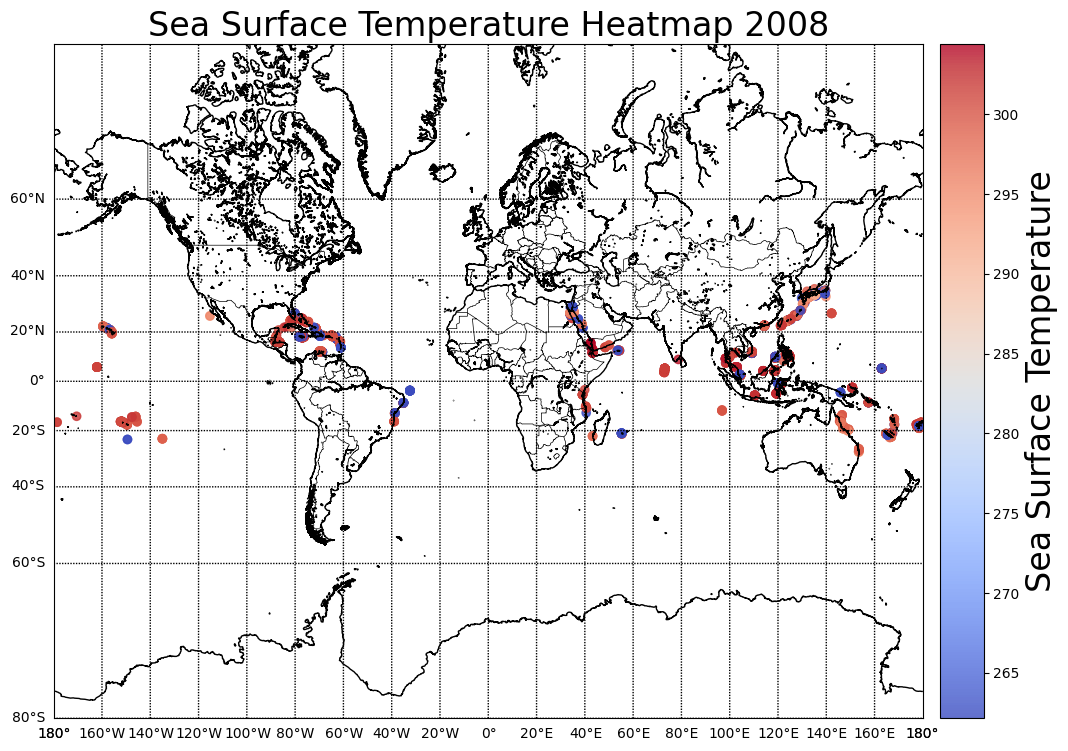

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

fontsize = 24
fontsize_title = 28
# Create a figure and axis with a size that you find appropriate
fig, ax = plt.subplots(figsize=(12, 10))

# Create a Basemap instance with a specific map projection, bounding lat/lon, and resolution
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max, resolution='i', ax=ax)

# Draw coastlines and countries for reference
m.drawcoastlines()
m.drawcountries()

# Convert your latitude and longitude to the map projection coordinates
x, y = m(bleaching_data_year['Longitude_Degrees'].values, bleaching_data_year['Latitude_Degrees'].values)

# Plot the heatmap using scatter, with the color intensity based on Percent_Bleaching
scatter = m.scatter(x, y, c=bleaching_data_year['ClimSST'], cmap='coolwarm', alpha=0.8)

# Create a colorbar and set its label
cb = m.colorbar(scatter, "right", size="5%", pad="2%")
cb.set_label('Sea Surface Temperature', fontsize=fontsize)

parallels = np.arange(lat_min, lat_max, 20.) # lines of latitude
meridians = np.arange(lon_min, lon_max, 20.) # lines of longitude
m.drawparallels(parallels, labels=[True,False,False,False])
m.drawmeridians(meridians, labels=[False,False,False,True])

# Show the plot
plt.title('Sea Surface Temperature Heatmap' + ' ' + str(year), fontsize=fontsize)
# save to ./figures/
save_fig_folder = os.path.join(os.getcwd(),os.pardir,'figures')
if not os.path.exists(save_fig_folder):
    os.makedirs(save_fig_folder)
save_fig_path = os.path.join(save_fig_folder,'Sea_Surface_Temperature_' + str(year) + '.png')
plt.savefig(save_fig_path)
plt.show()
